In [1]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [5]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [6]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [7]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [8]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [9]:
x.sort()
print(x)

[1 2 3 4 5]


In [10]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [11]:
x[i]

array([1, 2, 3, 4, 5])

In [12]:
rand = np.random.RandomState(94)
X = rand.randint(0, 10, (4, 6))
print(X)

[[2 0 5 3 2 6]
 [9 8 3 6 0 8]
 [7 0 2 7 9 1]
 [8 7 0 8 8 8]]


In [13]:
# Сортируем все столбцы массива Х
np.sort(X, axis=0)

array([[2, 0, 0, 3, 0, 1],
       [7, 0, 2, 6, 2, 6],
       [8, 7, 3, 7, 8, 8],
       [9, 8, 5, 8, 9, 8]])

In [14]:
# Сортируем все строки массива Х
np.sort(X, axis=1)

array([[0, 2, 2, 3, 5, 6],
       [0, 3, 6, 8, 8, 9],
       [0, 1, 2, 7, 7, 9],
       [0, 7, 8, 8, 8, 8]])

In [16]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [17]:
np.partition(X, 2, axis=1)

array([[0, 2, 2, 3, 5, 6],
       [0, 3, 6, 8, 9, 8],
       [0, 1, 2, 7, 9, 7],
       [0, 7, 8, 8, 8, 8]])

In [18]:
X = rand.rand(10, 2)

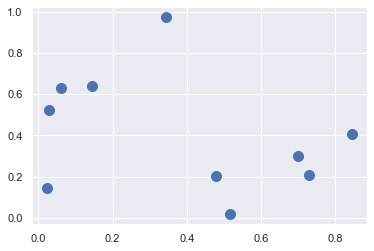

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [20]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=1)

In [21]:
# Для каждой пары точек вычисляем разности их координат
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [22]:
# Возводим разности координат в квадрат
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [23]:
# Суммируем квадраты разностей координат
# для получения квадрата расстояния
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [24]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
dist_sq

array([[0.        , 0.30279248, 0.58347408, 0.20089604, 0.94736705,
        0.15439786, 0.57184519, 0.73943312, 0.79397142, 0.61515827],
       [0.30279248, 0.        , 0.50269895, 0.01170149, 0.49644353,
        0.02600461, 0.68024322, 0.59462468, 0.14532354, 0.30700752],
       [0.58347408, 0.50269895, 0.        , 0.51673903, 0.11326361,
        0.424155  , 0.03263602, 0.00945885, 0.4814786 , 0.05847254],
       [0.20089604, 0.01170149, 0.51673903, 0.        , 0.58068785,
        0.00692483, 0.66239411, 0.62571958, 0.23586583, 0.35556877],
       [0.94736705, 0.49644353, 0.11326361, 0.58068785, 0.        ,
        0.52378539, 0.26020361, 0.08172821, 0.25869018, 0.03575015],
       [0.15439786, 0.02600461, 0.424155  , 0.00692483, 0.52378539,
        0.        , 0.5438996 , 0.52986506, 0.2580366 , 0.30145132],
       [0.57184519, 0.68024322, 0.03263602, 0.66239411, 0.26020361,
        0.5438996 , 0.        , 0.05343489, 0.74307551, 0.17610276],
       [0.73943312, 0.59462468, 0.0094588

In [27]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 5 3 1 6 2 9 7 8 4]
 [1 3 5 8 0 9 4 2 7 6]
 [2 7 6 9 4 5 8 1 3 0]
 [3 5 1 0 8 9 2 4 7 6]
 [4 9 7 2 8 6 1 5 3 0]
 [5 3 1 0 8 9 2 4 7 6]
 [6 2 7 9 4 5 0 3 1 8]
 [7 2 6 9 4 8 5 1 3 0]
 [8 1 9 3 5 4 2 7 6 0]
 [9 4 2 7 6 8 5 1 3 0]]


In [28]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

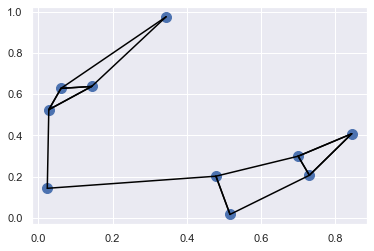

In [30]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# Рисуем линии из каждой точки к ее двум ближайшим соседям
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # чертим линию от X[i] до X[j]
        # Используем для этого «магическую» функцию zip:
        plt.plot(*zip(X[j], X[i]), color='black')